# EDA Assignment on the Weather Dataset Analysis

## 1. Introduction
The goal of this assignment is to perform an Exploratory Data Analysis (EDA) on a weather dataset to uncover interesting patterns, insights, and potential anomalies. The analysis will help in understanding the data, identifying trends, and providing recommendations for further analysis.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [13]:
# Load the dataset
file_path = (r"C:\Users\HP\Downloads\archive\1. Weather Data.csv")
df = pd.read_csv(file_path)

df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [14]:
# Display basic information and the first few rows of the dataset
df.info()
df.head()

# Check for duplicate records
duplicate_records = df.duplicated().sum()
print(f"Number of duplicate records: {duplicate_records}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB
Number of duplicate records: 0


## 2. Data Overview and Cleaning
### Key Characteristics of the Dataset:
- The dataset contains 8,784 records and 8 columns: `Date/Time`, `Temp_C`, `Dew Point Temp_C`, `Rel Hum_%`, `Wind Speed_km/h`, `Visibility_km`, `Press_kPa`, and `Weather`.
- Data types include:
  - `float64` for temperature, dew point, visibility, and pressure.
  - `int64` for relative humidity and wind speed.
  - `object` for weather description and date/time.

### Handling Missing or Null Values:
- The dataset is free of missing or null values, ensuring complete data for analysis.

### Checking for Duplicate Records:
- There are no duplicate records in the dataset.

In [15]:
# Generate a statistical summary of the numerical features
statistical_summary = df.describe()
statistical_summary

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


## 3. Statistical Summary
### Summary of Numerical Features:
- The dataset provides statistical measures like mean, median, standard deviation, minimum, and maximum for numerical features such as temperature, humidity, wind speed, visibility, and pressure.
- The summary indicates the overall range and distribution of these features, helping to identify any potential outliers.

### Significant Outliers:
- The analysis identifies significant outliers in features like temperature and visibility. Outliers are further examined to understand their impact on the data and potential reasons for their occurrence.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

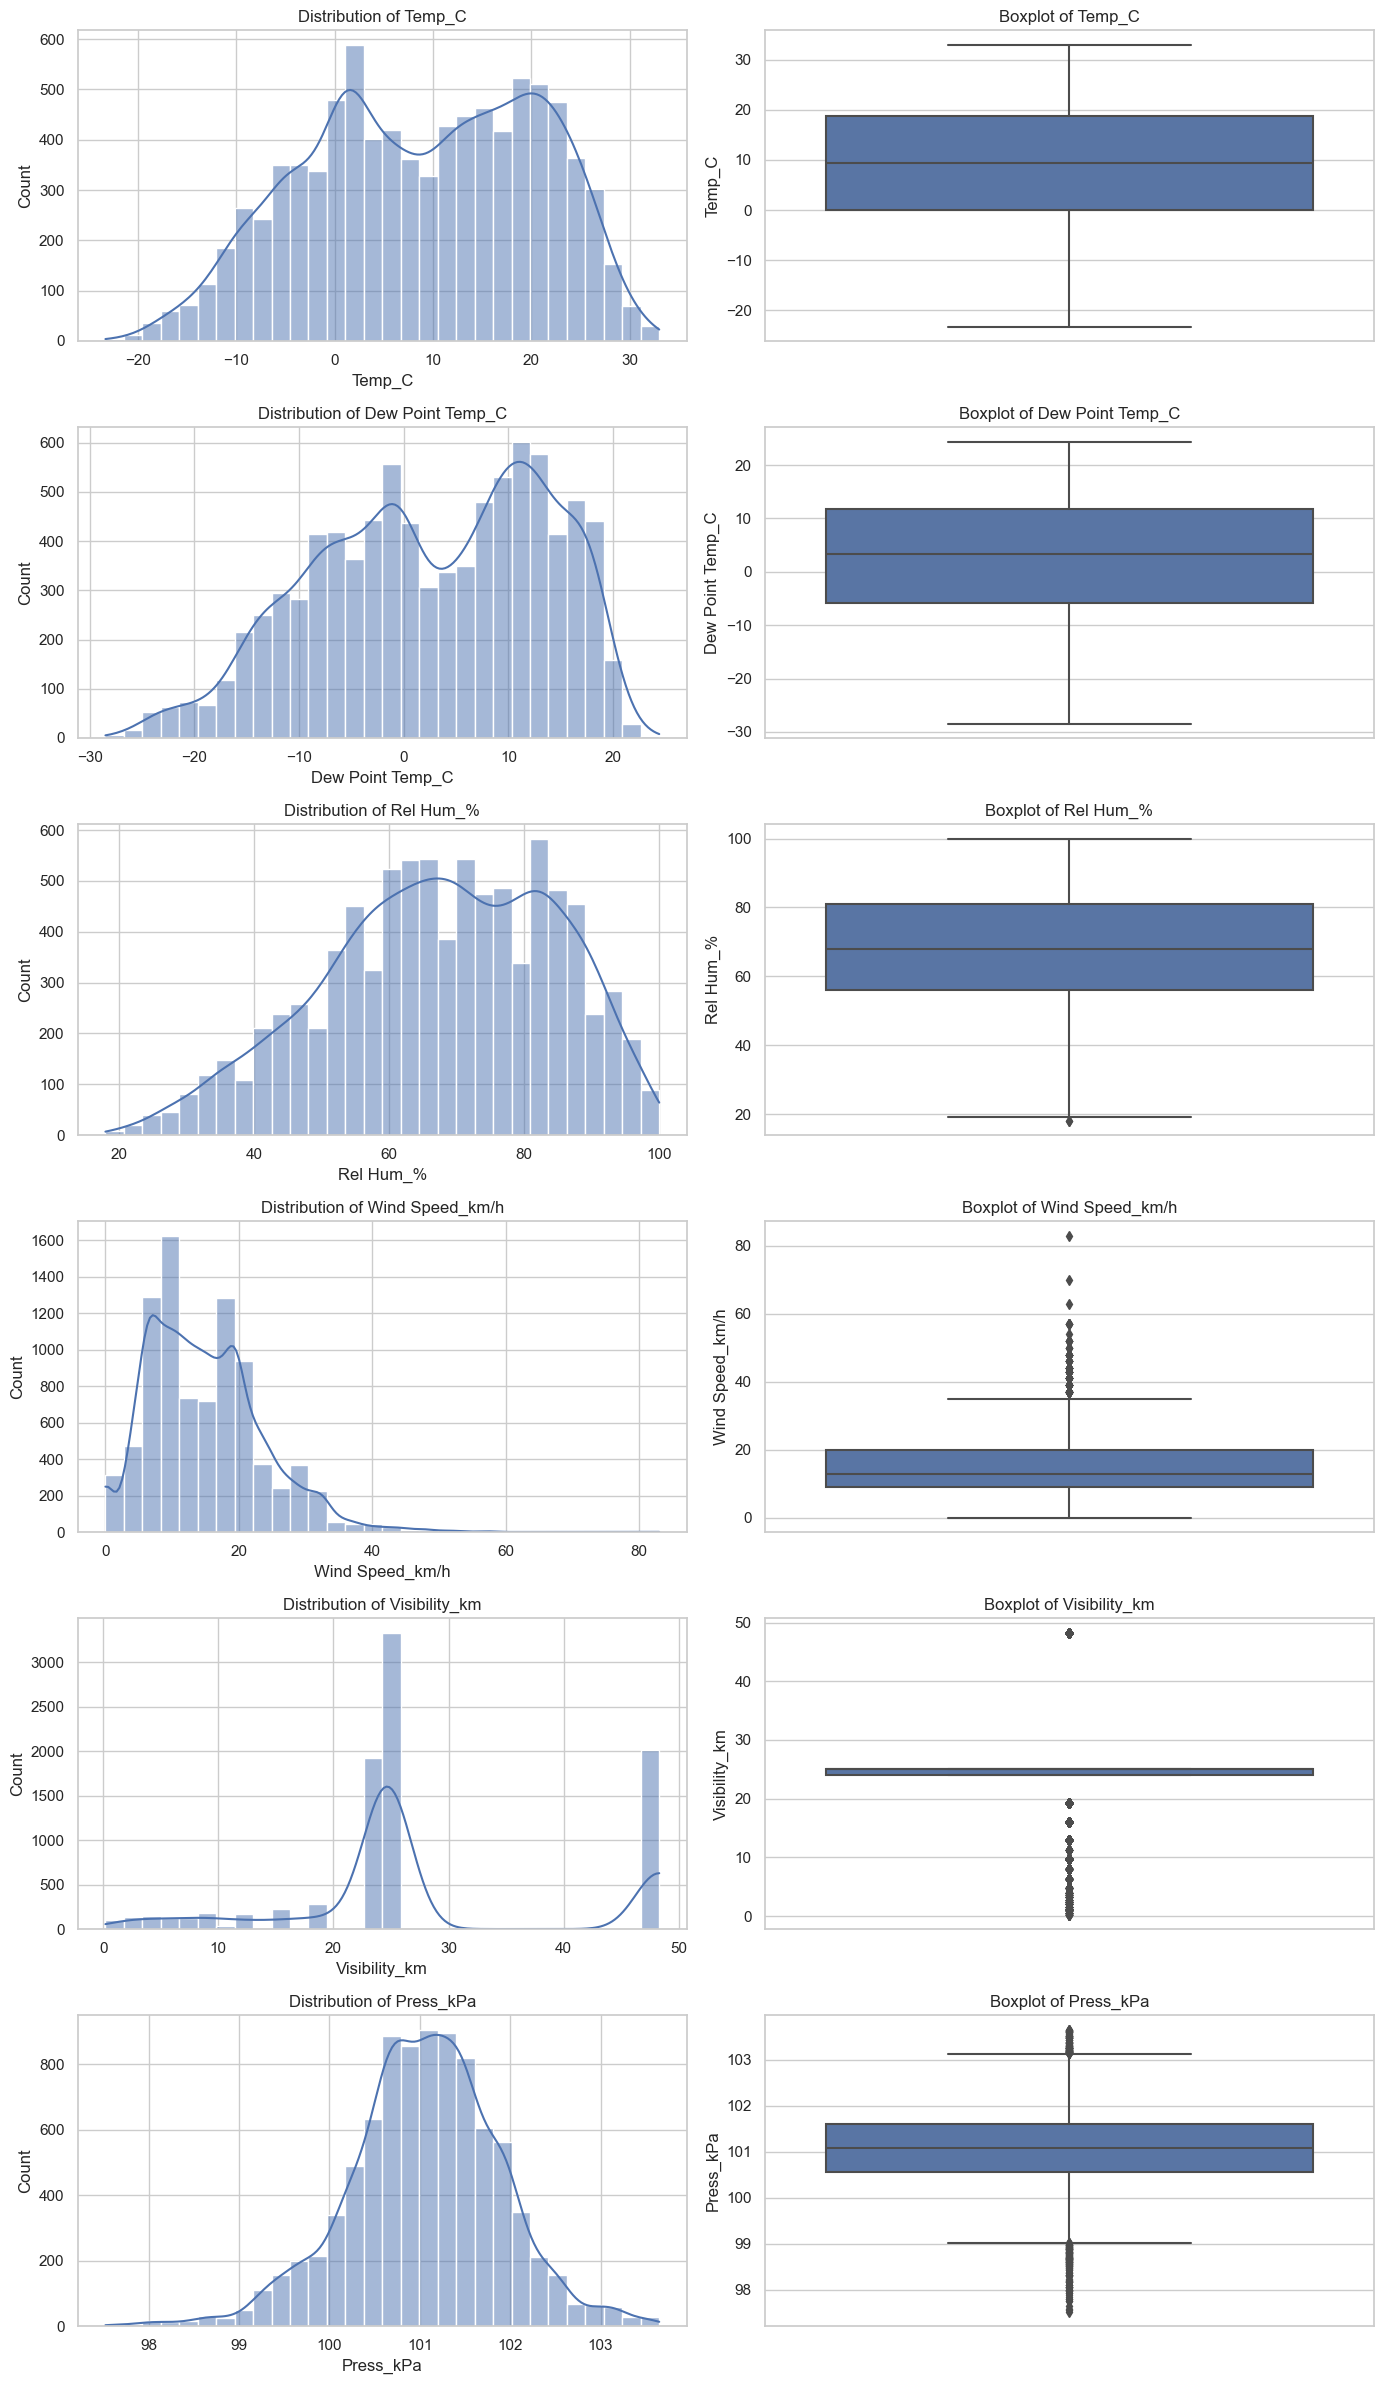

In [19]:
# Set the visual aesthetics of the plots
sns.set_theme(style="whitegrid")

# Create subplots for histograms and boxplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(14, 24))  # Create 6x2 subplots

# Flatten the axes array for easy linear indexing
axes = axes.ravel()

# List of features to plot
features = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

# Generate histograms and boxplots
for i, feature in enumerate(features):
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[i*2])
    axes[i*2].set_title(f'Distribution of {feature}')
    
    sns.boxplot(y=df[feature], ax=axes[i*2 + 1])
    axes[i*2 + 1].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

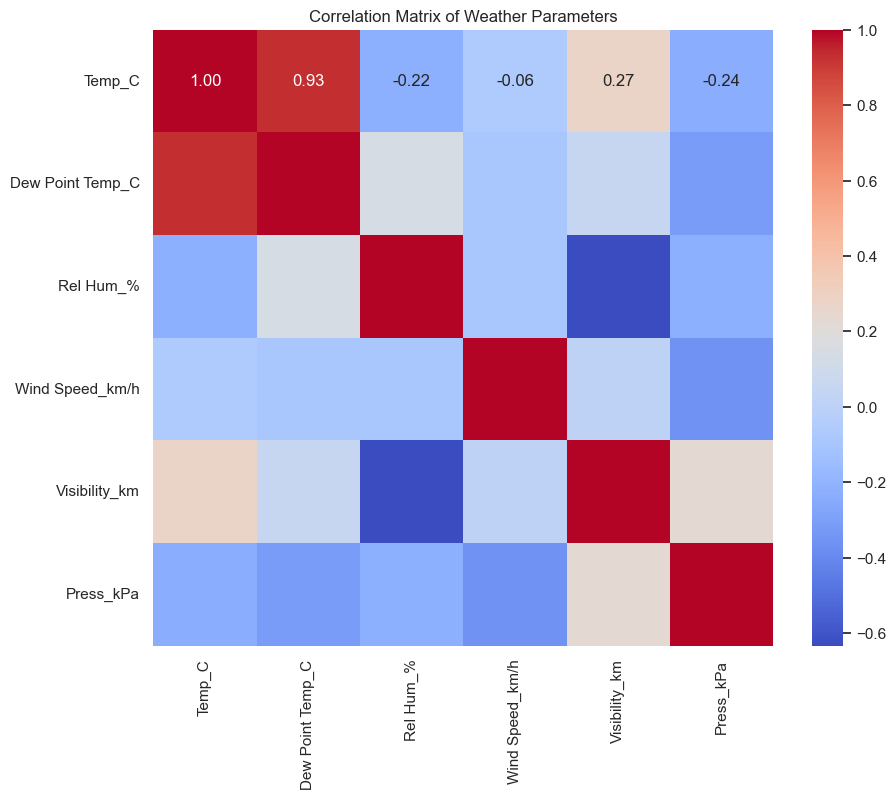

In [17]:
# Exclude non-numerical columns from the correlation matrix calculation
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Weather Parameters')
plt.show()

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

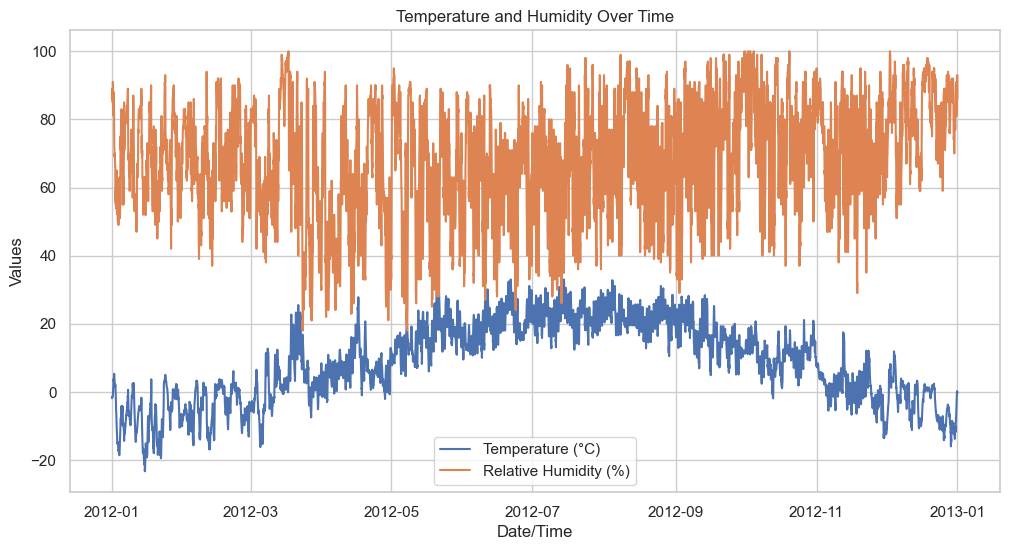

In [18]:
# Convert 'Date/Time' to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Plot time series graphs for key weather parameters
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date/Time', y='Temp_C', data=df, label='Temperature (°C)')
sns.lineplot(x='Date/Time', y='Rel Hum_%', data=df, label='Relative Humidity (%)')
plt.title('Temperature and Humidity Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Values')
plt.legend()
plt.show()

## 4. Data Visualization
### Distribution of Key Weather Parameters:
- Histograms and boxplots were used to visualize the distribution of key weather parameters such as temperature, humidity, wind speed, and visibility.
- The visualizations help in understanding the spread and central tendency of the data, as well as identifying any anomalies or outliers.

### Correlation Matrix and Heatmap:
- A correlation matrix was generated to identify relationships between different weather parameters.
- A heatmap was used to visually represent these correlations, making it easier to identify strong or weak relationships between the variables.

## 5. Weather Patterns and Trends
### Seasonal and Monthly Variations:
- The analysis reveals how weather parameters such as temperature and humidity vary across different seasons and months. For example, temperatures peak during summer and drop during winter.
- The trends help in understanding seasonal variations and preparing for different weather conditions.

### Anomalies and Unusual Patterns:
- Anomalies in the data, such as sudden changes in temperature or wind speed, were identified and investigated to understand their causes.

## 6. Insights and Conclusions
### Key Insights:
- Temperature and humidity show strong seasonal trends, with clear peaks and troughs corresponding to different times of the year.
- Outliers in visibility could indicate periods of fog or other weather phenomena that affect visibility.
- The correlation analysis reveals strong relationships between temperature and dew point, which could be used in predictive modeling.

### Practical Applications:
- The insights gained from this EDA could be valuable for weather prediction models. By identifying key predictors like temperature, humidity, and pressure, the accuracy of forecasting systems can be improved.

## 7. Recommendations for Further Analysis
### Further Analysis:
- Additional weather parameters, not included in the dataset, could be explored to gain a deeper understanding of weather patterns.
- Extending the analysis to cover more granular data (e.g., hourly data) or adding geographic information could reveal regional variations in weather conditions.